In [1]:
import pandas as pd
import numpy as np

df_train = pd.read_csv("AMLALL_train.data", header=None)
df_test = pd.read_csv("AMLALL_test.data", header=None)

print "Training and Test data now in memory"
print "Train data shape: ",df_train.shape
print "Test data shape: ",df_test.shape

Training and Test data now in memory
Train data shape:  (38, 7130)
Test data shape:  (34, 7130)


In [5]:
from sklearn import preprocessing as pp

encoder = pp.LabelEncoder()
encoder.fit(df_train[7129])

trainX = df_train.as_matrix(df_train.columns[0:-1])
trainY = encoder.transform(df_train[7129])

testX = df_test.as_matrix(df_test.columns[0:-1])
testY = encoder.transform(df_test[7129])

print "Pre-processing complete"

Pre-processing complete


In [7]:
trainXMean = trainX.mean(axis=0)
trainXStd = trainX.std(axis=0)

trainXNorm = (trainX - trainXMean.T) / trainXStd.T

testXMean = testX.mean(axis=0)
testXStd = testX.std(axis=0)

testXNorm = (testX - testXMean.T) / testXStd.T

numTrainSamples = trainX.shape[0]
numTestSamples = testX.shape[0]

print "Data normalized"

Data normalized


In [8]:
from time import time

st = time()

trainXSigma = trainXNorm.T.dot(trainXNorm) / numTrainSamples

trainU, trainS, trainV = np.linalg.svd(trainXSigma)

print "Eigen vectors computed for Training data in ", round(time()-st, 2)," seconds"

Eigen vectors computed for Training data in  161.81  seconds


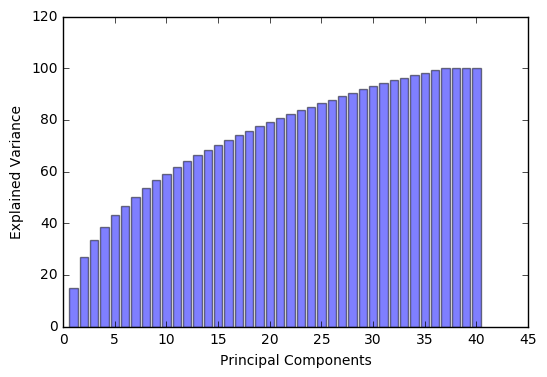

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt

total = trainS.sum()

variance = [(value / total) * 100 for value in trainS]
explainedVariance = np.cumsum(variance)

plt.bar(range(1,41), explainedVariance[:40], align='center', alpha=0.5)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
axes = plt.gca()
axes.set_ylim([0,120])
plt.show()

In [13]:
from time import time

st = time()

testXSigma = testXNorm.T.dot(testXNorm) / numTestSamples

testU, testS, testV = np.linalg.svd(testXSigma)

print "Eigen vectors computed for Testing data in ", round(time()-st, 2)," seconds"

Eigen vectors computed for Testing data in  162.7  seconds


In [14]:
trainXReduced = trainXNorm.dot(trainU[:,:36])
testXReduced = testXNorm.dot(testU[:,:36])

print "Number of features reduced to 36 from 7129 after PCA!"

Number of features reduced to 36 from 7129 after PCA!


In [15]:
from sklearn import linear_model

lg = linear_model.LogisticRegression()

lg.fit(trainXReduced, trainY)
pred = lg.predict(testXReduced)

acc = (pred == testY).sum() *100 / len(pred)

print "Logistic Regression: Accuracy = ",acc,"%"

Logistic Regression: Accuracy =  82 %


In [17]:
from sklearn import svm

clf = svm.SVC()

clf.fit(trainXReduced, trainY)
pred = clf.predict(testXReduced)

acc = (pred == testY).sum() *100 / len(pred)

print "SVM: Accuracy = ",acc,"%"

SVM: Accuracy =  58 %


In [18]:
from sklearn import linear_model

lg = linear_model.LogisticRegression()

lg.fit(trainX, trainY)
pred = lg.predict(testX)

acc = (pred == testY).sum() *100 / len(pred)

print "Logistic Regression: Accuracy = ",acc,"%"

Logistic Regression: Accuracy =  97 %
